<a href="https://colab.research.google.com/github/jihun5/jupyter_home/blob/main/(14)%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_%EC%A0%84%EC%B2%B4%EC%BD%94%EB%93%9C_%EB%B0%8F_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

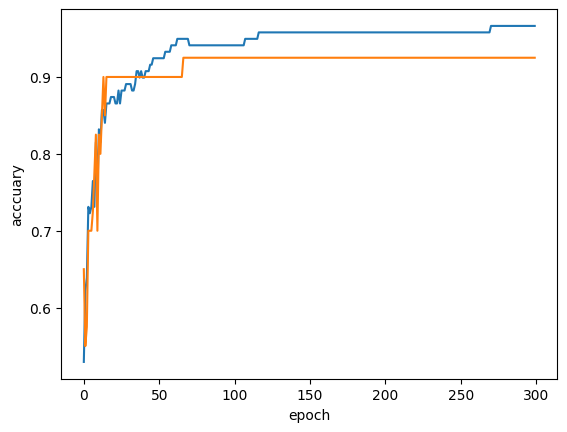

0.957983193277311
0.925
0.9495798319327731
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('acccuary')
plt.show()

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

확률적 경사 하강법은 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 샘플을 여러 개 사용하면 미니배치 경사 하강법이라고 부르고, 한 번에 전체 샘플을 사용하면 배치 경사 하강법이 된다.

손실 함수는 확률적 경사 하강법이 최적화할 대상이다. 이진분류에서는 로지스틱회귀 또는 이진 크로스엔트로피 손실 함수를 사용한다. loss='log', 다중 분류에서는 크로스엔트로피 손실 함수를 사용한다.

회귀문제에서는 평균 제곱 오차 손실(mse)함수를 사용한다.

에포크는 전체 샘플을 모두 사용하는 한번 반복을 의미한다.

SGDClassifier는 확률적 경사 하강법을 사용한 분류 모델을 만든다.
loss 매개변수는 확률적 경사 하강법으로 최적화할 손실 함수를 지정한다. 기본값은 hinge손실 함수다. 로지스틱 회귀를 위해서는 log로 지정한다.

penalty 매개변수에서 규제의 종류를 지정할 수 있다. 기본값은 L2 규제를 위한 l2이다. 규제강도는 alpha 매개변수에서 지정하며 기본값은 0.0001이다.

max_iter매개변수는 에포크 횟수를 지정한다. 기본값은 1000이다.
tol은 에포크를 멈출 조건이다. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면 알고리즘이 중단된다. tol의 기본값은 0.001이고, n_iter_no_change의 매개변수의 기본값은 5이다.

SGDCRegressor은 확률적 경사 하강법을 사용한 회귀모델을 만든다.
loss매개변수에서 손실 함수를 지정한다. 기본값은 제곱 오차를 나타내는 'squared_loss'이다.
앞의 SGDClassifier에서 설명한 모든 매개변수는 SGDRegressor에서 동일하게 사용된다.